<a href="https://colab.research.google.com/github/Praneeth-18/DataMining6/blob/main/Anomaly_Detection_using_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyOD (Python Outlier Detection) is a comprehensive and scalable Python toolkit for detecting outliers in multivariate data. It offers various algorithms for anomaly detection. Let's demonstrate anomaly detection using PyOD on a synthetic multivariate dataset.

In this scenario, we'll use a synthetic dataset representing credit card transactions. Each transaction will have features like the amount of the transaction and some other hypothetical attributes. We'll use anomaly detection to identify potentially fraudulent transactions.

In [1]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=34380a839e83a34320721760991da3758dcbf5397e6f09a2242bcc43aa47f827
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


## **Use Case: Credit Card Fraud Detection**

In this scenario, we'll use a synthetic dataset representing credit card transactions. Each transaction will have features like the amount of the transaction and some other hypothetical attributes. We'll use anomaly detection to identify potentially fraudulent transactions.

In [2]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(1000, 2)  # 1000 transactions, 2 features each
X[::10] += 5  # Add anomalies
y = np.zeros(1000)
y[::10] = 1  # Label anomalies as 1

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize KNN detector
knn = KNN()

# Fit the model on the training data
knn.fit(X_train)

# Get the prediction labels and outlier scores
y_pred = knn.predict(X_test)

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       180
         1.0       0.60      0.60      0.60        20

    accuracy                           0.92       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.92      0.92      0.92       200



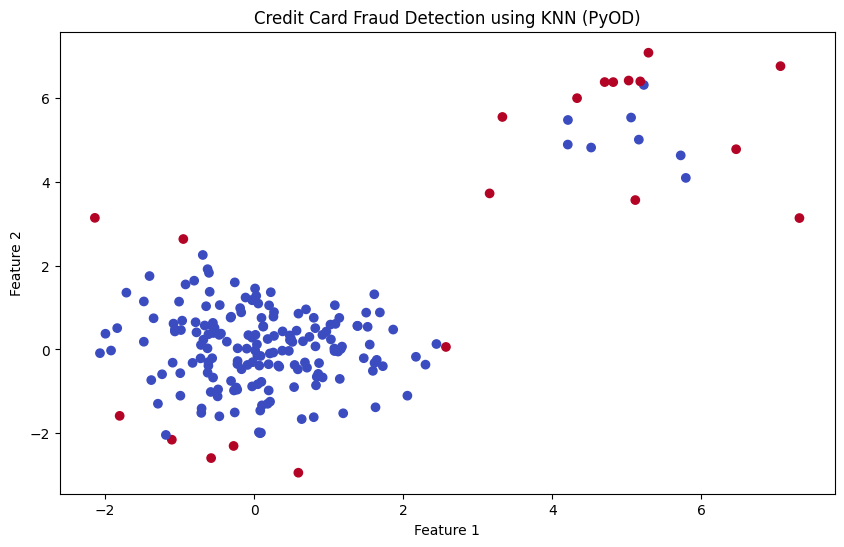

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Credit Card Fraud Detection using KNN (PyOD)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In this use case, the KNN model from PyOD is employed to detect anomalies in a dataset resembling credit card transactions. Such an approach can be an integral part of a system that flags transactions for further investigation, helping to prevent fraud. The effectiveness of this method depends on the quality and representativeness of the data, as well as the choice and tuning of the anomaly detection algorithm.

## **Use Case: Multivariate Anomaly Detection**

We'll create a synthetic dataset with two features for simplicity, making it easy to visualize. We'll use the K-Nearest Neighbors (KNN) algorithm, a common choice for anomaly detection.

In [7]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X_train, X_test, y_train, y_test = generate_data(n_train=200, n_test=100, n_features=2, contamination=0.1, random_state=42)

# Combine the training and test data for visualization
X = np.vstack((X_train, X_test))
y = np.concatenate([y_train, y_test])

In [9]:
# Initialize KNN detector
knn = KNN()

# Fit the model on the training data
knn.fit(X_train)

# Get the prediction labels and outlier scores
y_pred = knn.predict(X)  # Outlier labels (0 or 1)
scores = knn.decision_function(X)  # Outlier scores

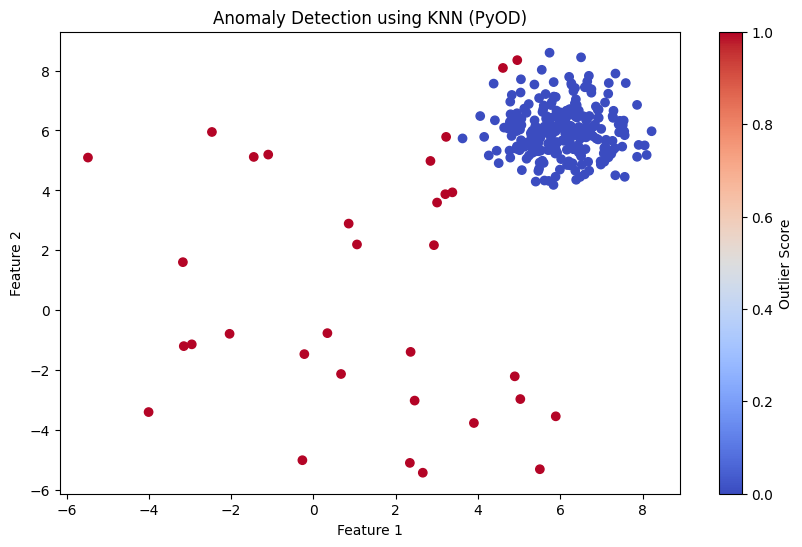

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Anomaly Detection using KNN (PyOD)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Outlier Score')
plt.show()

Enhancing the credit card fraud detection scenario using PyOD involves implementing some of the advanced techniques mentioned earlier. Let's focus on a few key areas: experimenting with different algorithms, handling imbalanced data, and evaluating the model. We'll use a synthetic dataset for this demonstration.

In [11]:
pip install imbalanced-learn

In [13]:
from pyod.models.knn import KNN as KNNClassifier
from pyod.models.iforest import IForest as IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt


In [14]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(1000, 2)  # 1000 transactions, 2 features each
X[::10] += 5  # Add some outliers (fraudulent transactions)
y = np.zeros(1000)
y[::10] = 1  # Label outliers as 1 (fraud)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [20]:
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
# AutoEncoder requires keras and TensorFlow, ensure they are installed
from pyod.models.auto_encoder import AutoEncoder
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
models = {
    'KNN': KNN(),
    'Isolation Forest': IForest()
}

# AutoEncoder requires specific neural network architecture settings
# Adjust hidden_neurons depending on the number of features in your dataset
hidden_neurons = [2, 1, 2]  # Example for a dataset with 2 features
autoencoder = AutoEncoder(hidden_neurons=hidden_neurons, epochs=10, contamination=0.1)
models['AutoEncoder'] = autoencoder

# Fit and evaluate models
for name, model in models.items():
    model.fit(X_train_res)

    # Predict anomalies
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"{name} Model:")
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-" * 30)


KNN Model:
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       180
         1.0       0.13      0.20      0.16        20

    accuracy                           0.79       200
   macro avg       0.52      0.53      0.52       200
weighted avg       0.83      0.79      0.80       200

Accuracy: 0.785
------------------------------
Isolation Forest Model:
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       180
         1.0       0.17      0.25      0.20        20

    accuracy                           0.81       200
   macro avg       0.54      0.56      0.55       200
weighted avg       0.84      0.81      0.82       200

Accuracy: 0.805
------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         

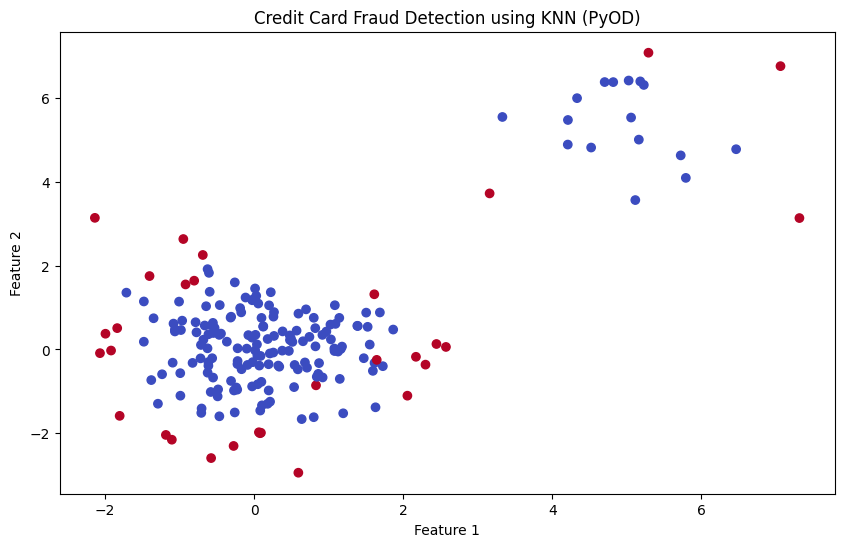

In [21]:
knn = KNN()
knn.fit(X_train_res)

# Predict anomalies
y_pred_knn = knn.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn, cmap='coolwarm')
plt.title("Credit Card Fraud Detection using KNN (PyOD)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()